In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p_1 = pd.read_csv('Output/p_lgbm_DART.csv').set_index('customer_ID', drop=True).rename(columns={'prediction': 'p_1'})
p_2 = pd.read_csv('Output/submission.csv').set_index('customer_ID', drop=True).rename(columns={'prediction': 'p_2'})

In [3]:
prediction_df = pd.concat([p_1, p_2], axis=1)
prediction_df

,p_1,p_2
customer_ID,,
00000469ba478561f23a92a868bd366de6f6527a684c9a2e78fb826dcac3b9b7,0.022633,0.022078
00001bf2e77ff879fab36aa4fac689b9ba411dae63ae397d4263dafa1daedef5,0.000552,0.001576
0000210045da4f81e5f122c6bde5c2a617d03eef67f82c5e400fc98e7bd43ce8,0.043525,0.031195
00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976cf6e56734528702d694,0.225644,0.258286
00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9a4693dd914fca22557,0.882492,0.704350
...,...,...
ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c5d60460dba6dedc41e,0.009781,0.013653
ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3a4f0ca3de613b0b2ad,0.784413,0.626575
ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475cb095d2443a68030f1,0.389915,0.471557


In [4]:
prediction_df['diff'] = prediction_df['p_2'] - prediction_df['p_1']
prediction_df.sort_values(by = 'diff', ascending = False, inplace=True)
prediction_df

,p_1,p_2,diff
customer_ID,,,
31e8856f5518cedbaebd6f59b5ea64c9c51b7abb7d08da34b42373189bce1fb9,0.206304,0.511626,0.305322
257ec4e45b6293a6899194652bbf258695a4b956d3fe7e09e75b54e68e1842a6,0.159191,0.437953,0.278762
03c87870a6d73629d61a55a17cb3ba6dbe7baa9a8700d16ef810f4f3f265ab2c,0.473952,0.741424,0.267472
587e90dbe37d8198ee56e594ca972b8b3afcdb96139c13ff5be0a38d1eb950d5,0.274919,0.522546,0.247627
b65c9f54c8264bd0158026c8b577c1fee717ac86ecc6fc9ffb7d0c490c04cf3f,0.329891,0.573881,0.243990
...,...,...,...
e02ac34f7d8fa7d87d7d59a805ddcccad9ecc3b0afca9c2679a74a969a9208d8,0.718796,0.380348,-0.338449
ece6e350df1d95b8e5abcbffc7a1ab4e1e0ac0ef24cfdfa84d329050a98ae6ff,0.685382,0.343206,-0.342176
ff08d40e56160b7dd7efca4e9e683ff36693fe7be3ffd774a20b57c32070b3dc,0.536691,0.193503,-0.343189


[]

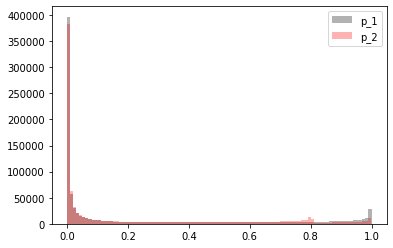

In [5]:
plt.hist(prediction_df.p_1, bins=100, color = 'black', alpha = 0.3)
plt.hist(prediction_df.p_2, bins=100, color='red', alpha = 0.3)
plt.legend(['p_1', 'p_2'])
plt.plot()

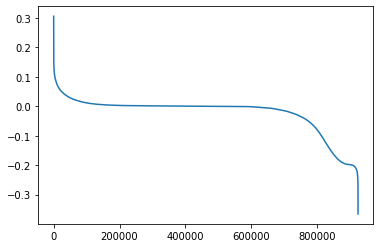

In [6]:
plt.plot(range(0, prediction_df.shape[0], 1), (prediction_df['diff']))

In [7]:
pred = prediction_df.p_2 * 0.05 + prediction_df.p_1 * 0.95
pred

customer_ID
31e8856f5518cedbaebd6f59b5ea64c9c51b7abb7d08da34b42373189bce1fb9    0.221570
257ec4e45b6293a6899194652bbf258695a4b956d3fe7e09e75b54e68e1842a6    0.173129
03c87870a6d73629d61a55a17cb3ba6dbe7baa9a8700d16ef810f4f3f265ab2c    0.487326
587e90dbe37d8198ee56e594ca972b8b3afcdb96139c13ff5be0a38d1eb950d5    0.287300
b65c9f54c8264bd0158026c8b577c1fee717ac86ecc6fc9ffb7d0c490c04cf3f    0.342090
                                                                      ...   
e02ac34f7d8fa7d87d7d59a805ddcccad9ecc3b0afca9c2679a74a969a9208d8    0.701874
ece6e350df1d95b8e5abcbffc7a1ab4e1e0ac0ef24cfdfa84d329050a98ae6ff    0.668273
ff08d40e56160b7dd7efca4e9e683ff36693fe7be3ffd774a20b57c32070b3dc    0.519532
7c61e22d63ddcc6f63d15e24b4f5460cb544a49c032da5f8a8953a5a3dc82c96    0.807614
2b965739da1b4621b711921b52d69c5a46e8ef2a0125ea2fa1112e0cf06d87c3    0.776520
Length: 924621, dtype: float64

In [8]:
pred.to_csv('Output/p_blend.csv',header=['prediction'])